# Thermalization

Is there a rough criteria to check for thermalization?

## Generate test data

100%|██████████| 259999/259999 [00:09<00:00, 26321.86it/s]


0.7346182100700387


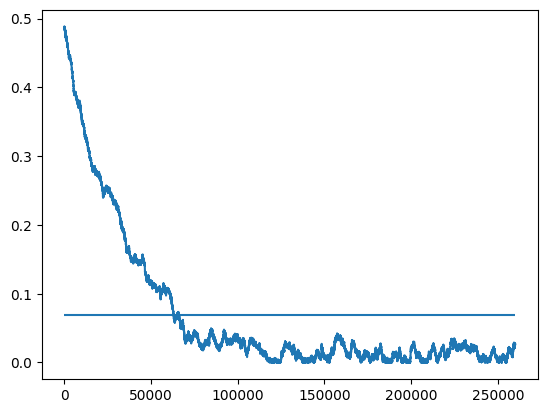

In [59]:
import matplotlib.pyplot as plt
import numpy as np

from implementation.lattice import Phi4Lattice

lattice = Phi4Lattice(linear_sites=26, mass2=-3.789473684210526, coupling_strength=8.0)
rng = np.random.default_rng(seed=42)
a_coeff = np.sqrt(-lattice.mass2 / (2 * lattice.coupling_strength))
# initial_field = (2 * rng.random(size=lattice.shape) - 1.0) * a_coeff
initial_field = a_coeff * np.ones(shape=lattice.shape)
# initial_field = np.ones(shape=lattice.shape) * 1.1 * a_coeff
# initial_field = np.zeros(shape=lattice.shape)

def observable(field: np.ndarray) -> np.ndarray:
    return np.abs(np.sum(field) / field.size)

observations, acceptance, last_field = lattice.sample_observable(observable=observable,
                                                                 initial_field=initial_field,
                                                                 num_samples=260_000,
                                                                 method="uniform",
                                                                 rng=rng,
                                                                 half_width=0.012)
print(np.mean(acceptance))

fig, ax = plt.subplots()
ax.plot(observations)
ax.hlines(y=np.mean(observations), xmin=0, xmax=len(observations) - 1)
plt.show()

100%|██████████| 19999/19999 [00:09<00:00, 2104.94it/s]


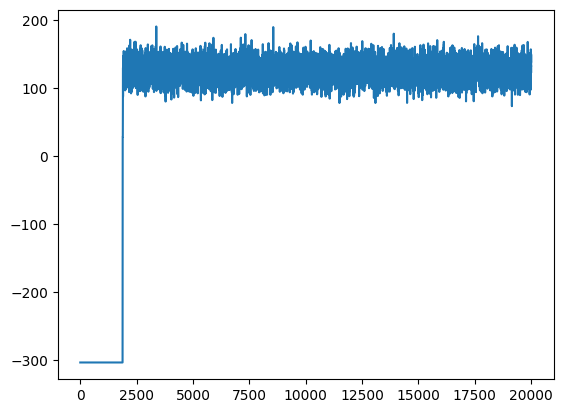

In [94]:
lattice = Phi4Lattice(linear_sites=26, mass2=-3.789473684210526, coupling_strength=8.0)
rng = np.random.default_rng(seed=42)
a_coeff = np.sqrt(-lattice.mass2 / (2 * lattice.coupling_strength))
initial_field = a_coeff * np.ones(shape=lattice.shape)

samples, acceptance = lattice.sample_field(initial_field=initial_field,
                                           num_samples=20_000,
                                           method="hamiltonian", integration="leapfrog",
                                           rng=rng,
                                           delta_t=0.077, time_steps=round(1. / 0.077))

action_values = [lattice.evaluate_action(field) for field in samples]

fig, ax = plt.subplots()
ax.plot(action_values)
plt.show()

In [98]:
# np.min(samples[-1]), np.max(samples[-1]), np.mean(samples[-1]), np.std(samples[-1])
# lattice.evaluate_force(samples[0])
lattice.evaluate_action(field=np.zeros(shape=lattice.shape))
# np.max(np.abs(lattice.evaluate_force(samples[-1])))

np.float64(0.0)

The Euclidean action is given by
\begin{equation}
    S^{E} = \int \mathrm{d}^{2}x \; \left[ (\nabla \phi)^{2} + m^{2} \phi^{2} + \lambda \phi^{4} \right] = \int \mathrm{d}^{2}x \; \left[ -\phi \nabla^{2} \phi + m^{2} \phi^{2} + \lambda \phi^{4} \right]
\end{equation}
Performing the first variation and setting it equal to zero yields
\begin{equation}
    \frac{\delta S^{E}}{\delta \phi(\mathbf{x})} = 0 \implies \nabla^{2} \phi = (m^{2} + 2 \lambda \phi^{2}) \phi
\end{equation}

\begin{equation}
    \delta S^{E} = \int \mathrm{d}^{2}x \; 2 \left[-\nabla^{2} \phi + m^{2} \phi + 2 \lambda \phi^{3} \right] \delta\phi
\end{equation}

\begin{equation}
    \delta^{2} S^{E} = \int \mathrm{d}^{2}x \; 2 \left[ (\nabla \delta \phi)^{2} + (m^{2} + 6 \lambda \phi^{2} ) (\delta \phi)^{2} \right]
\end{equation}

bIn order for $S^{E}$ to have a relative minimum at some field configuration $\phi(\mathbf{x})$ (which corresponds to the most likely configuration), we require that
\begin{equation}
    \nabla^{2} \phi = (m^{2} + 2 \lambda \phi^{2}) \phi
\end{equation}
and that
\begin{equation}
    \delta^{2} S^{E} = \int \mathrm{d}^{2}x \; 2 \left[ (\nabla \delta \phi)^{2} + (m^{2} + 6 \lambda \phi^{2} ) (\delta \phi)^{2} \right] \geq 0
\end{equation}

\begin{equation}
    p(\phi) = \exp{\left\{-\left[ \int \mathrm{d}^{2}x \; \phi^{2} \right] \right\}}
\end{equation}

In [75]:
# TODO: For a 3 x 3 lattice with -1, 0, +1 possible values for each, how many configurations have the same values for the sum of the squared values of the lattice

# TODO: Minimum value is 0, maximum value is 9.

action_values = []

for i1 in range(-1, 2):
    for i2 in range(-1, 2):
        for i3 in range(-1, 2):
            for i4 in range(-1, 2):
                for i5 in range(-1, 2):
                    for i6 in range(-1, 2):
                        for i7 in range(-1, 2):
                            for i8 in range(-1, 2):
                                for i9 in range(-1, 2):
                                    action_values.append((i1 ** 2) + (i2 ** 2) + (i3 ** 2)
                                                         + (i4 ** 2) + (i5 ** 2) + (i6 ** 2)
                                                         + (i7 ** 2) + (i8 ** 2) + (i9 ** 2))

print(action_values[0])

9


In [89]:
action_values = np.array(action_values)
normalization = np.sum(np.exp(-action_values))

total_probability = 0

for value in set(action_values):
    counts = len(action_values[action_values == value])
    probability = counts * np.exp(-value) / normalization
    total_probability += probability
    print(value, counts, probability)

print(total_probability)

0 1 0.006991903617625483
1 18 0.04629919672037967
2 144 0.13626018092943962
3 672 0.233927489666462
4 2016 0.25817134251940915
5 4032 0.18995185842504253
6 5376 0.09317251136917544
7 4608 0.02937964407002753
8 2304 0.005404083521148804
9 512 0.00044178916128978274
1.0000000000000002


In [4]:
import numpy as np
np.exp(-(0 ** 2) / 2) / np.sqrt(2 ** np.pi), 1 * np.exp(-(0.001 ** 2) / 2) / np.sqrt(2 ** np.pi)

(np.float64(0.33662253682241905), np.float64(0.33662236851119276))